![dsl logo](https://github.com/BrockDSL/ARCH_Data_Explore/blob/main/dsl_logo.png?raw=true)

Various graphs showing the number of crawls for each domain. 

Omitted is the domain of *niagararegion.ca* as it had a disproportionate 
number of crawls and is considered an outlier. 

In [1]:
import requests
import numpy as np
import pandas as pd
import itertools
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.collections import PolyCollection
from mpl_toolkits import mplot3d
%matplotlib inline
from numpy.random import default_rng

In [2]:
def download_file(url, filename=None, loud=True):
  
  if not filename:
    filename = url.split('/')[-1]
  
  r = requests.get(url, stream=True)
  if loud:
    total_bytes_dl = 0
    content_len = int(r.headers['Content-Length'])

  with open(filename, 'wb') as fd:
      for chunk in r.iter_content(chunk_size=4096):
          fd.write(chunk)
          if loud:
            total_bytes_dl += 4096
            percent = int((total_bytes_dl / content_len) * 100.0)
            print(f'\rDownload progress of {filename} {total_bytes_dl}/{content_len}: {percent}%',end='')
  r.close()

def get_muni_data():
  download_file("https://brockau.s3.us-east-2.amazonaws.com/municipal_data.csv.gz")
  !gunzip -f municipal_data.csv.gz
  archive_data = pd.read_csv("municipal_data.csv")
  archive_data.drop(columns=['Unnamed: 0', 'index', 'v_pos','v_neg','v_neu','v_comp', 'mime_type_web_server', 'mime_type_tika', 'language'], inplace=True)
  #archive_data = archive_data[archive_data.content.notna()]
  archive_data.crawl_date = pd.to_datetime(archive_data.crawl_date)
  archive_data.content = archive_data.content.astype("string")
  return archive_data

In [3]:
r = requests.get('https://raw.githubusercontent.com/BrockDSL/ARCH_Data_Explore/main/urls_of_interest.txt')
urls_of_interest = r.text.split()

domains = [
"westlincoln.ca",
"thorold.ca",
"forterie.ca",
"welland.ca",
"niagararegion.ca",
"notl.com",
"wainfleet.ca",
"portcolborne.ca",
"grimsby.ca",
"lincoln.ca",
"pelham.ca",
"niagarafalls.ca",
"stcatharines.ca"]

#Retrieve data
data = get_muni_data()
data = data[data.url.isin(urls_of_interest)]
datac = data.set_index('domain')

Download progress of municipal_data.csv.gz 51339264/51335494: 100%

In [4]:
nd_2020 = datac[datac.crawl_date < '2021-01-01'].groupby(by='domain').count().sort_values(by='crawl_date')
nd_2021 = datac[datac.crawl_date >= '2021-01-01'].groupby(by='domain').count().sort_values(by='crawl_date')

print("2020 Crawl numbers")
print(nd_2020)
print()
print("2021 Crawl numbers")
print(nd_2021)

2020 Crawl numbers
                  crawl_date  url  content  length
domain                                            
grimsby.ca                24   24       24      24
pelham.ca                 24   24       24      24
stcatharines.ca           26   26       26      26
thorold.ca                33   33       33      33
welland.ca                33   33       33      33
wainfleet.ca              36   36       36      36
forterie.ca               37   37       37      37
lincoln.ca                40   40       40      40
notl.com                  60   60       60      60
portcolborne.ca           72   72       72      72
westlincoln.ca            76   76       76      76
niagarafalls.ca          105  105      105     105
niagararegion.ca         381  381      381     381

2021 Crawl numbers
                  crawl_date  url  content  length
domain                                            
pelham.ca                 20   20       20      20
welland.ca                21   21       21 

In [5]:
datac[datac.url == "https://www.notl.com/COVID-19/"]

,crawl_date,url,content,length
domain,,,,
notl.com,2020-05-15,https://www.notl.com/COVID-19/,﻿ COVID-19 | Niagara on the Lake Skip to main ...,7983
notl.com,2020-05-16,https://www.notl.com/COVID-19/,﻿ COVID-19 | Niagara on the Lake Skip to main ...,8044
notl.com,2020-05-22,https://www.notl.com/COVID-19/,﻿ COVID-19 | Niagara on the Lake Skip to main ...,8427
notl.com,2020-05-22,https://www.notl.com/COVID-19/,﻿ COVID-19 | Niagara on the Lake Skip to main ...,8427
notl.com,2020-05-27,https://www.notl.com/COVID-19/,﻿ COVID-19 | Niagara on the Lake Skip to main ...,8698
...,...,...,...,...
notl.com,2021-12-17,https://www.notl.com/COVID-19/,﻿ COVID-19 | Niagara on the Lake Skip to main ...,4342
notl.com,2021-12-24,https://www.notl.com/COVID-19/,﻿ COVID-19 | Niagara on the Lake Skip to main ...,3583
notl.com,2021-12-24,https://www.notl.com/COVID-19/,﻿ COVID-19 | Niagara on the Lake Skip to main ...,3583


Here is a quick and simple visualization of total crawls over the entire 2020-04 - 2021-12 period. 

Text(0.5, 1.0, 'Total crawls between 2020-04-08 - 2021-12-31')

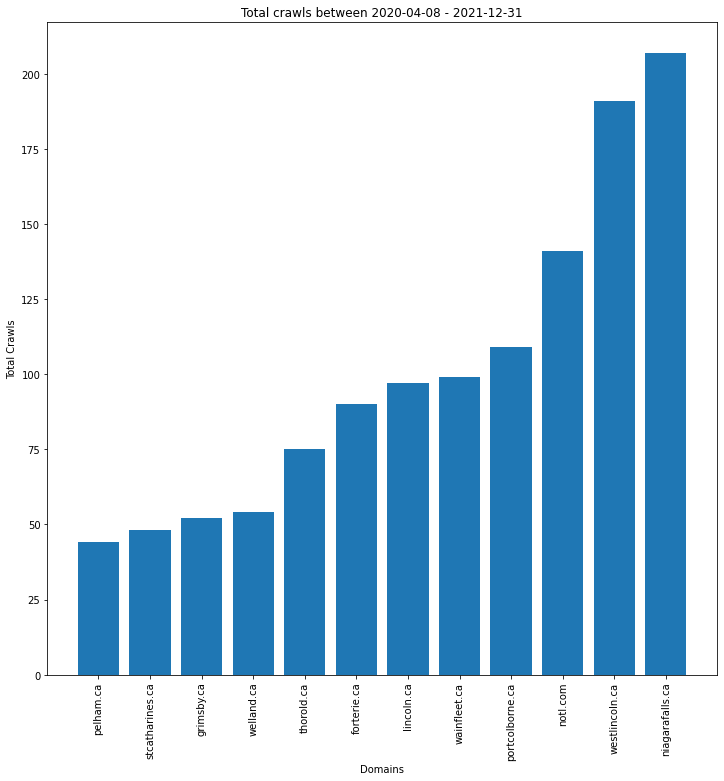

In [6]:
barchart_data = datac.groupby(by='domain').count().sort_values(by='crawl_date').iloc[:-1]
fig, ax = plt.subplots(figsize=(12,12))
x_pos = range(len(barchart_data))
ax.bar(x_pos,barchart_data.crawl_date)
ax.set_xticks(x_pos)
ax.set_xticklabels(barchart_data.index.values, rotation=90)
ax.set_ylabel('Total Crawls')
ax.set_xlabel('Domains')
ax.set_title('Total crawls between 2020-04-08 - 2021-12-31')


Next we have a 3D visualization of the crawls by month. Its hard to read specific values but it gives a nice overview of the relationship between domains.

In [7]:
frames = []
domains = set(data['domain'])

for d in domains:
  frames.append(datac.loc[d].groupby(pd.Grouper(key='crawl_date',freq="1M")).count())
monthly_crawl_count = pd.concat(frames, keys=list(domains))

In [8]:
#3D Graphs in matplot don't support using arrays of anything other than floats 
#as axis data. Since our axis consist of X: crawl_dates, Y: Domains, Z: Crawl Counts
#We need to create a mapping from strings to ints for X,Y

crawl_dates = sorted(set(monthly_crawl_count.index.get_level_values('crawl_date').to_pydatetime()))
cd_to_xtick = {d:i for i,d in enumerate(crawl_dates)}
reverse_cd_map = {i:d for i,d in enumerate(crawl_dates)}
domains_by_ncrawls = monthly_crawl_count.groupby(level=0).sum().url.sort_values().index
domains_by_ncrawls = domains_by_ncrawls[:-1] #remove niagararegion.ca outlier

verts = []

last_domain = None
max_crawl_count = 0

#.loc[domains_by_ncrawls] returns values in sorted order 
for d in domains_by_ncrawls:
  current_polygon = []
  
  for t in monthly_crawl_count.loc[d].sort_index().itertuples():
    tstamp = t.Index.to_pydatetime()
    tstamp_int = cd_to_xtick[tstamp]
    crawl_count = t.url
    max_crawl_count = max(crawl_count, max_crawl_count)
    if not current_polygon:
      current_polygon.append((tstamp_int,0))
    current_polygon.append((tstamp_int, crawl_count))
  current_polygon.append((current_polygon[-1][0],0))
  verts.append(current_polygon)

[Text(0, 0, 'pelham.ca'),
 Text(0, 0, 'stcatharines.ca'),
 Text(0, 0, 'grimsby.ca'),
 Text(0, 0, 'welland.ca'),
 Text(0, 0, 'thorold.ca'),
 Text(0, 0, 'forterie.ca'),
 Text(0, 0, 'lincoln.ca'),
 Text(0, 0, 'wainfleet.ca'),
 Text(0, 0, 'portcolborne.ca'),
 Text(0, 0, 'notl.com'),
 Text(0, 0, 'westlincoln.ca'),
 Text(0, 0, 'niagarafalls.ca')]

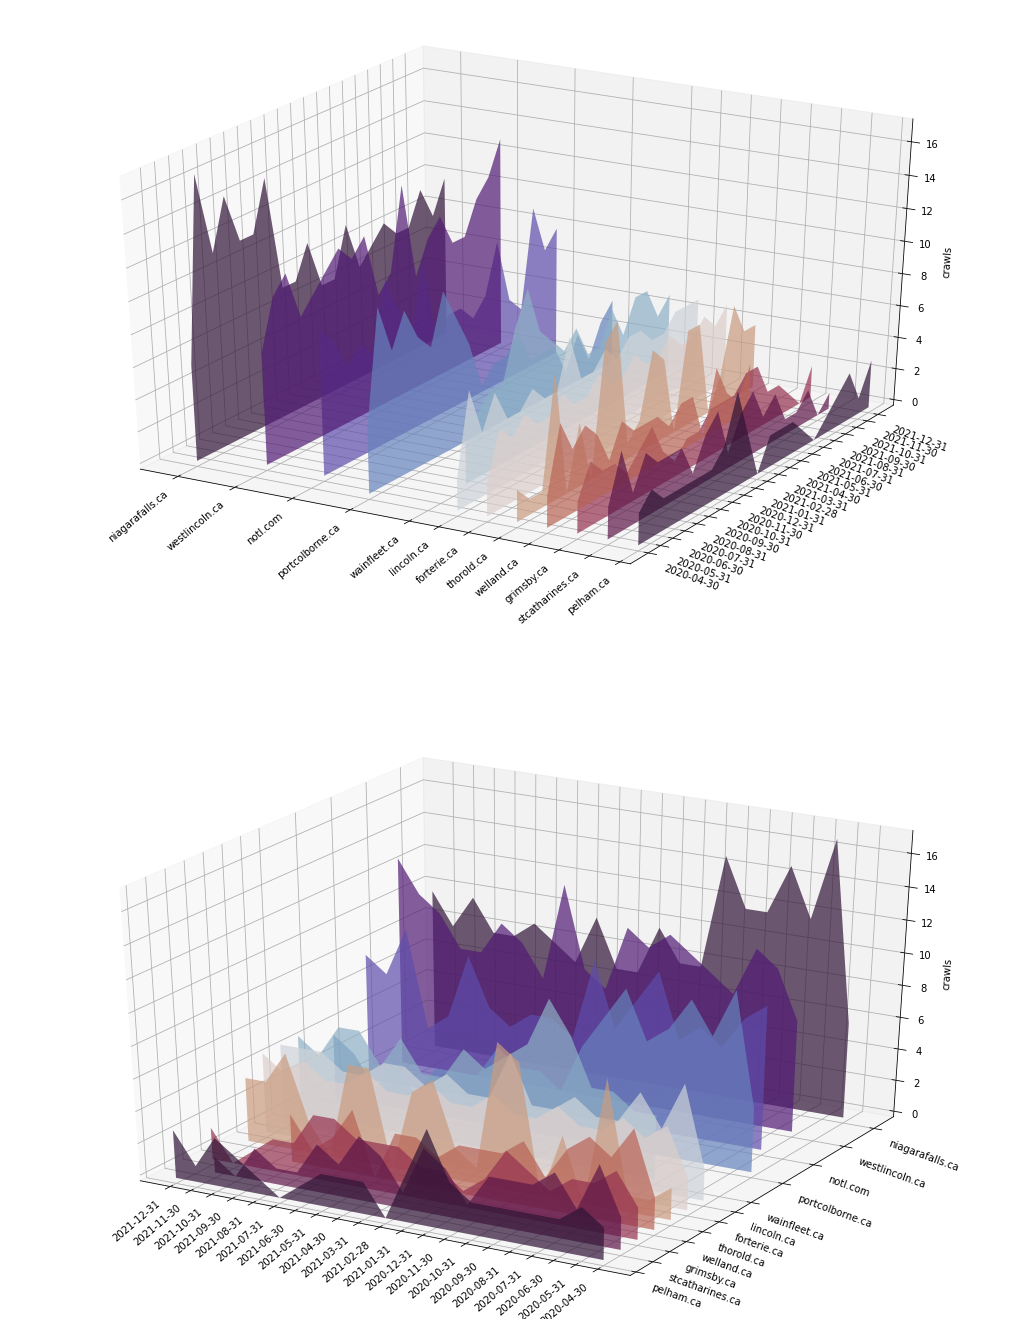

In [9]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(18, 24), subplot_kw={'projection': '3d'})

facecolors = plt.get_cmap('twilight_shifted_r')(np.linspace(0, 1, len(verts)))
zs = [0,2,4,6,8,10,12,14,18,22,26,30]

poly = PolyCollection(verts, facecolors=facecolors, alpha=.7)
ax1.add_collection3d(poly, zs=zs, zdir='x')

max_y = max(reverse_cd_map)
ax1.set(xlim=(0,32), ylim=(-1,max_y+1), zlim=(0, max_crawl_count),
       xlabel='', ylabel='', zlabel='crawls')
ax1.invert_xaxis()

ax1.set_xticks(zs)
ax1.set_xticklabels(domains_by_ncrawls,rotation=40,ha="right")

ytick_labels = [reverse_cd_map[i].strftime("%Y-%m-%d") for i in sorted(reverse_cd_map)]
ax1.set_yticklabels(ytick_labels,rotation=-20,ha='left')
ax1.set_yticks(range(max_y+1))

poly = PolyCollection(verts, facecolors=facecolors, alpha=.7)
ax2.add_collection3d(poly, zs=zs, zdir='y')

max_x = max(reverse_cd_map)
ax2.set(xlim=(-1,max_x+1), ylim=(0,32), zlim=(0, max_crawl_count),
       xlabel='', ylabel='', zlabel='crawls')
ax2.invert_xaxis()

ax2.set_xticks(range(max_x+1))
x_tick_labels = [reverse_cd_map[i].strftime("%Y-%m-%d") for i in sorted(reverse_cd_map)]
ax2.set_xticklabels(x_tick_labels,rotation=40,ha='right')
ax2.set_yticks([0,2,4,6,8,10,12,14,18,22,26,30])
ax2.set_yticklabels(domains_by_ncrawls,rotation=-20,ha="left")

This graph I like the best as it is 2D and easier to read. Unfortunately it is quite a large graph.

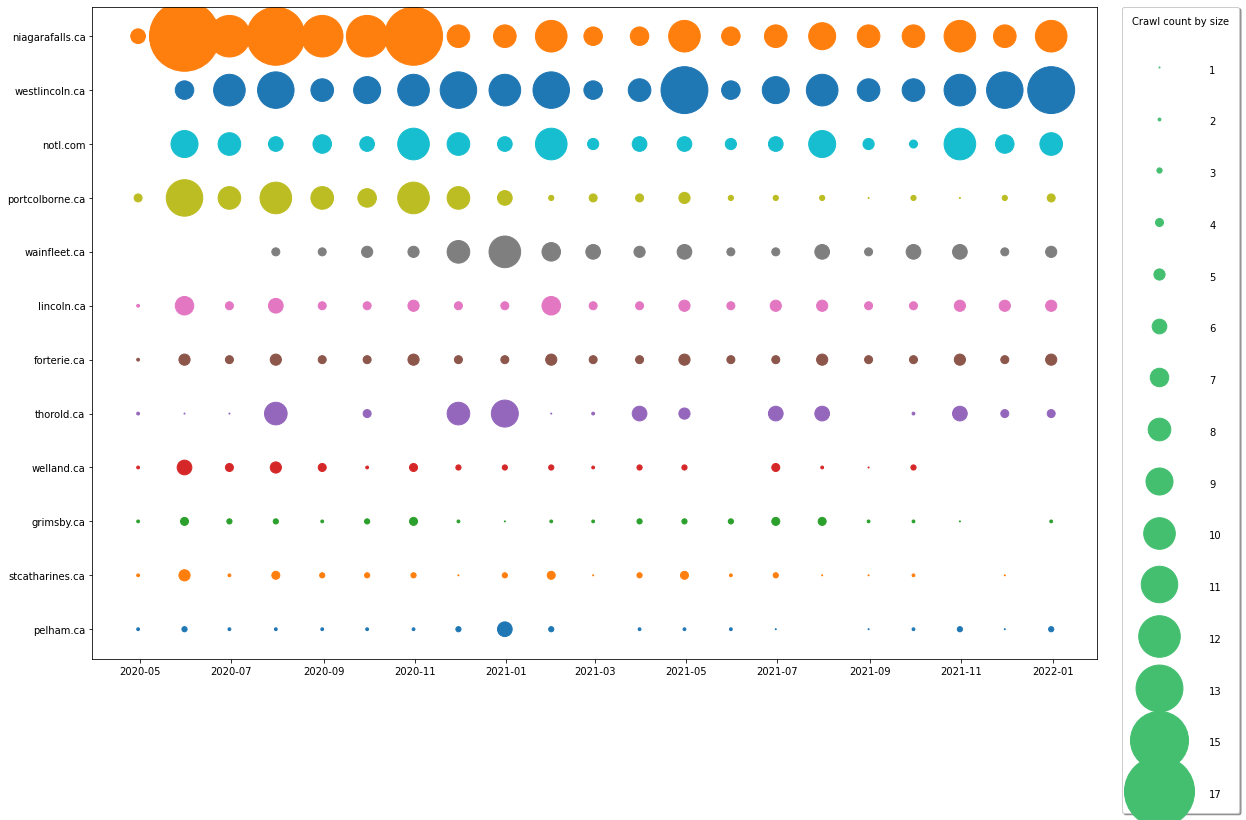

In [10]:
import math
fig, ax = plt.subplots(figsize=(18,12))
crawl_dates = sorted(set(monthly_crawl_count.index.get_level_values('crawl_date').to_pydatetime()))
cd_to_xtick = {d:i for i,d in enumerate(crawl_dates)}
reverse_cd_map = {i:d for i,d in enumerate(crawl_dates)}
domains_by_ncrawls = monthly_crawl_count.groupby(level=0).sum().url.sort_values().index
domains_by_ncrawls = domains_by_ncrawls[:-1]

max_crawl_count = 0
y = -1
for d in domains_by_ncrawls:
  xaxis = []
  zaxis = []  
  y = y + 1

  for t in monthly_crawl_count.loc[d].sort_index().itertuples():
    tstamp = t.Index.to_pydatetime()
    tstamp_int = cd_to_xtick[tstamp]
    crawl_count = t.url
    max_crawl_count = max(crawl_count, max_crawl_count)

    xaxis.append(tstamp)
    zaxis.append(crawl_count**3) #artificially inflate size to create larger circles
  scatter = ax.scatter(xaxis,[d]*len(xaxis),s=zaxis)

# Here we create a legend:
# we'll plot empty lists with the desired size and label
sizes = sorted(set(map(lambda t: t.url**3, monthly_crawl_count.loc[domains_by_ncrawls].itertuples())))
sizes.remove(0)
for area in sizes:
    ax.scatter([], [], color=scatter.cmap(0.7), s=area, label=str(math.ceil(area**(1/3))))
ax.legend(scatterpoints=1, loc="upper left",bbox_to_anchor=(1.025, 1), fancybox=True, frameon=True, shadow=True, handleheight=2.2,
          borderaxespad=0., borderpad=1, labelspacing=3.5, handlelength=4, handletextpad=3,  title='Crawl count by size')
